In [7]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline

In [2]:
# load results
#results = pickle.load( open( "results_exp_mnist_low_sample.p", "rb" ) )
# if the file is saved from python 2
results = pickle.load(open("results_exp_mnist_full.p", "rb"), encoding='latin1')
deltalist = results[0]
powerlist = results[1]
powerlist_oracle = results[2]

cdflist = results[3]
cdflist_oracle = results[4]

powerlist_x = results[5]
cdflist_x = results[6]

powerlistT = np.array(powerlist).T

print(powerlistT)

print(powerlist_x)

[[ 0.022  0.128  0.332  0.208  0.598  0.162  0.644  0.49   0.502  0.8  ]
 [ 0.026  0.12   0.336  0.206  0.806  0.71   0.81   0.614  0.692  0.806]
 [ 0.046  0.104  0.252  0.204  0.778  0.746  0.716  0.888  0.878  0.964]
 [ 0.058  0.08   0.294  0.208  0.724  0.88   0.846  0.904  0.81   0.976]
 [ 0.048  0.076  0.302  0.262  0.774  0.672  0.866  0.972  0.866  0.982]]
[0.02, 0.089999999999999997, 0.060000000000000005, 0.13, 0.14000000000000001, 0.26000000000000001, 0.23000000000000001, 0.38, 0.12, 0.28000000000000003]


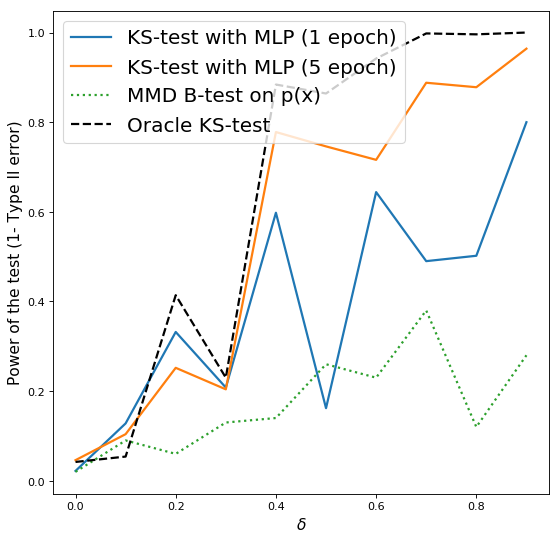

In [21]:
#plot figures
fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

num_epoch = 1
legendslist=[]
# plot the comparison
for ind,item in enumerate(powerlistT):
    if ind ==0 or ind ==2:
        plt.plot(deltalist,item,linewidth=2)
        legendslist.append('KS-test with MLP ('+repr(num_epoch)+' epoch)')
    num_epoch += 2
    


plt.plot(deltalist,powerlist_x,linewidth=2,linestyle=':')
plt.plot(deltalist,powerlist_oracle,linewidth=2, color='k',linestyle='--')

legendslist.append('MMD B-test on p(x)')
legendslist.append('Oracle KS-test')
plt.xlabel('$\delta$', fontsize=14)
plt.ylabel('Power of the test (1- Type II error)',fontsize=14)
plt.legend(legendslist, loc='best',fontsize=18)

#plt.title('Comparing the power at 0.05 level of significance',fontsize=14)

plt.show()

fig.savefig("Hypothesis-Testing-power-as-we-train-more.pdf", bbox_inches='tight')

In [4]:
# plot the QQ-plot for different levels

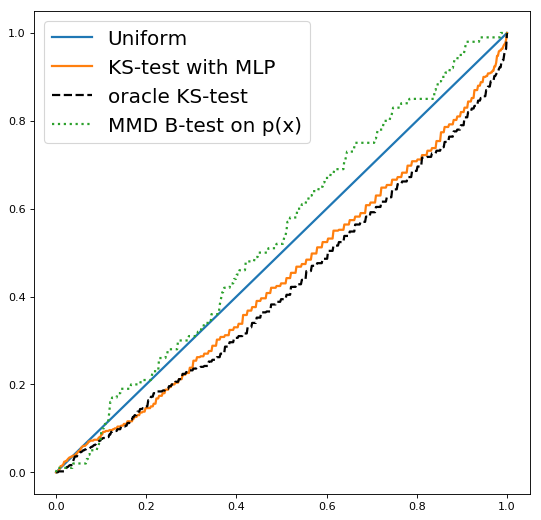

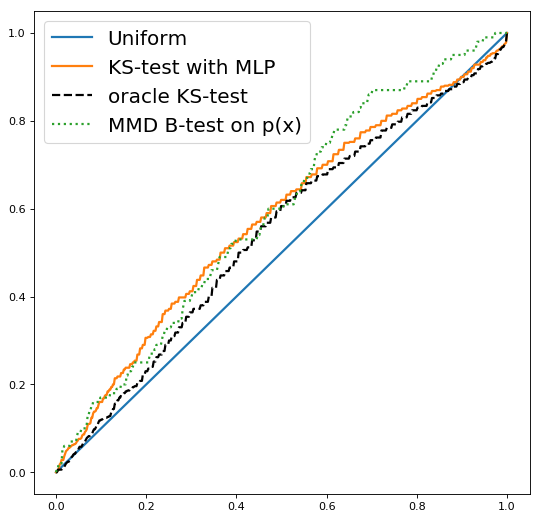

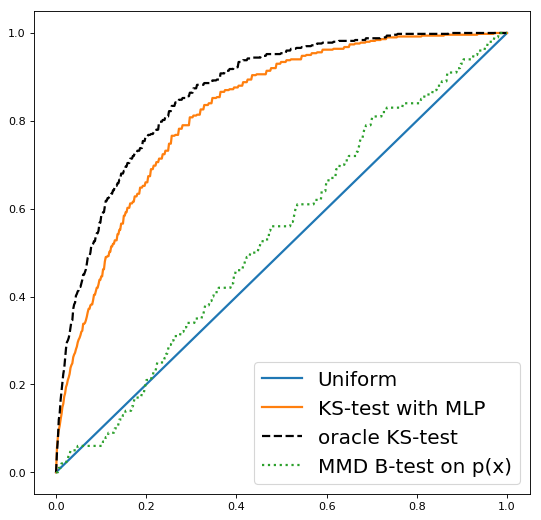

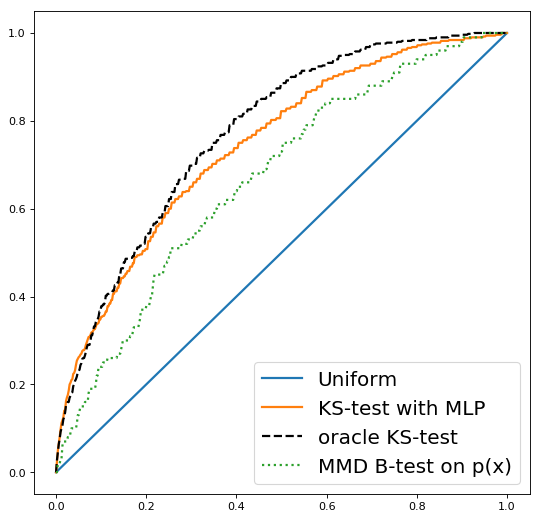

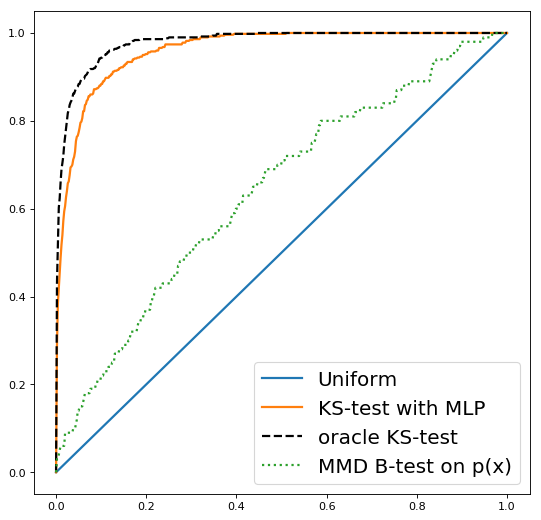

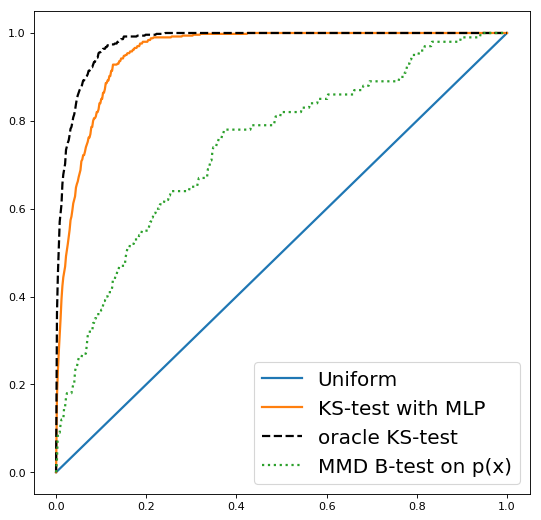

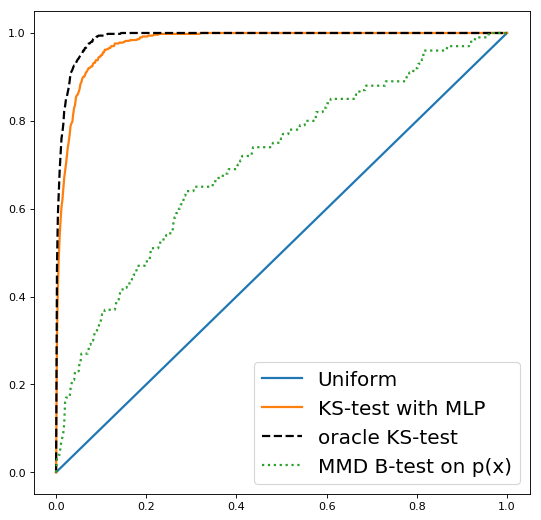

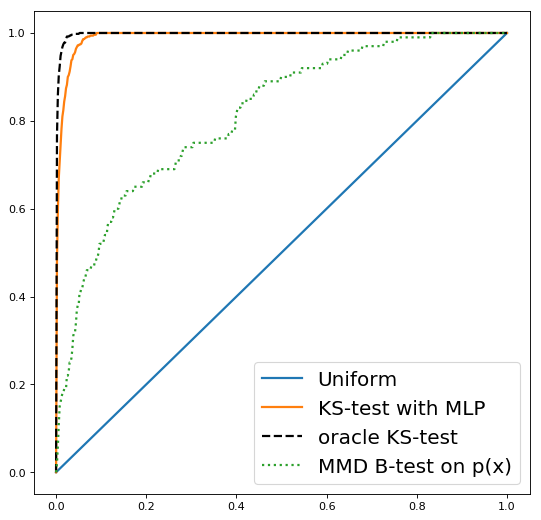

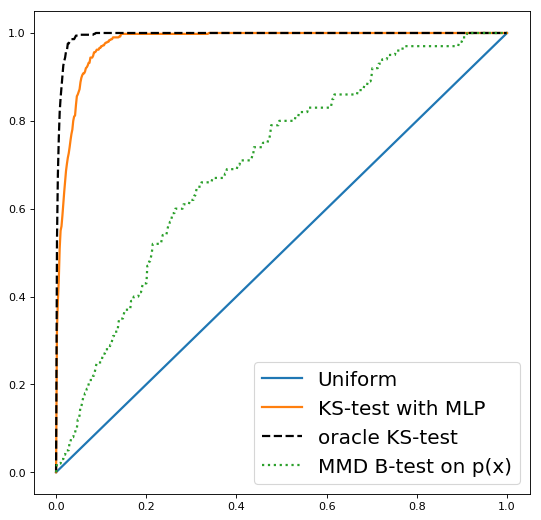

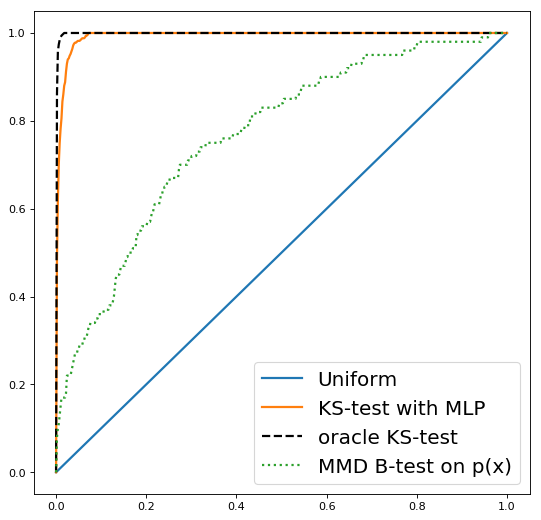

In [22]:
for (delta,item1,item2,item3) in zip(deltalist,cdflist,cdflist_oracle,cdflist_x):
    fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    
    delta = int(delta*10)
    xx=  np.linspace(0, 1, num=500)

    cdfpval = item1
    cdfpval_gnd = item2
    cdfpval_x = item3
    plt.plot(xx, xx,linewidth=2)
    plt.plot(xx, cdfpval(xx),linewidth=2)
    plt.plot(xx, cdfpval_gnd(xx),linewidth=2,color='k',linestyle='--')
    plt.plot(xx, cdfpval_x(xx),linewidth=2,linestyle=':')

    plt.legend(['Uniform', 'KS-test with MLP', 'oracle KS-test','MMD B-test on p(x)'], loc='best',fontsize=18)
    #plt.title('CDF of p-values', fontsize=18)
    fig.savefig("Hypothesis-Testing"+"delta-0"+repr(delta)+".pdf", bbox_inches='tight')

In [167]:
exp_name = 'dirichlet'
nlen =5 # set to smaller than 5 if the 8000 experiments are not over.

results = pickle.load(open("results_exp_benchmarking_"+exp_name+".p", "rb"), encoding='latin1')
#results_exp_benchmarking_jan30_badpred
#ToPickle = [alpha_range, nlist, num_runs, methods_name, allresults]
#allresults[(alpha,n)].append([results,p_P,p_Q])
#results are {"acc_list": acc_list, "wt_list": wt_list}
# acc_list.append([acc_weighted,C,Cp])

alpha_range = results[0]
nlist = results[1]
num_runs = results[2]

methods_name = results[3]
allresults = results[4]

if len(results) > 5:
    methods_name_fast = results[5]
    num_runs_slow = results[6]
else:
    methods_name_fast = methods_name
    num_runs_slow = num_runs

MSE_vs_n = {}
STD_vs_n = {}

ACC_vs_n = {}
ACCSTD_vs_n = {}

RELACC_vs_n = {}
RELACCSTD_vs_n = {}


for alpha in alpha_range:
    for name in methods_name:
        MSE_vs_n[(alpha,name)] = []
        STD_vs_n[(alpha,name)] = []
        ACC_vs_n[(alpha,name)] = []
        ACCSTD_vs_n[(alpha,name)] = []
        RELACC_vs_n[(alpha,name)] = []
        RELACCSTD_vs_n[(alpha,name)] = []
    for n in nlist[:nlen]:
        tmp = allresults[(alpha,n)]
        print(n)
        
        rep_data={}
        for name in methods_name:
            rep_data[("estimation",name)] = []
            rep_data[("testacc",name)] = []
            rep_data[("relacc",name)] = []
            
        for i,exp_results in enumerate(tmp): # enumerate over repeats
                           
            p_P = exp_results[1]
            p_Q = exp_results[2]
            w0 = np.array(p_Q)/np.array(p_P)
            tmp1 = exp_results[0]
            wt_list = tmp1["wt_list"]
            acc_list = tmp1["acc_list"]
            if i >= num_runs_slow:
                methods_name_cur  = methods_name_fast
            else:
                methods_name_cur = methods_name
            for (wt,acc,name) in zip(wt_list,acc_list,methods_name_cur):
                if name is not None:
                    rep_data[("estimation",name)].append(np.sum((wt-w0)**2))
                    rep_data[("testacc",name)].append(acc[0])
                    rep_data[("relacc",name)].append(acc[0]-acc_list[0][0])
                    print(name, " MSE", np.sum((wt-w0)**2), "ACC", acc[0],
                          "relacc", acc[0]-acc_list[0][0])
        for name in methods_name:
            MSE_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("estimation",name)])))
            STD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("estimation",name)]))/np.sqrt(num_runs_slow))
            ACC_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("testacc",name)])))
            ACCSTD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("testacc",name)]))/np.sqrt(num_runs_slow))
            RELACC_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("relacc",name)])))
            RELACCSTD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("relacc",name)]))/np.sqrt(num_runs_slow))
        for name in methods_name_fast:
            STD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in STD_vs_n[(alpha,name)]]
            ACCSTD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in ACCSTD_vs_n[(alpha,name)]]
            RELACCSTD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in RELACCSTD_vs_n[(alpha,name)]]




500
unweighted  MSE 81.0743801652893 ACC 0.80078125 relacc 0.0
BBSE  MSE 98.52651759541693 ACC 0.80859375 relacc 0.0078125
BBSE-prob  MSE 97.370172253934 ACC 0.8027344 relacc 0.001953125
KMM-Tars  MSE 45.902395803601934 ACC 0.8222656 relacc 0.021484375
unweighted  MSE 81.0743801652893 ACC 0.8066406 relacc 0.0
BBSE  MSE 98.7687897344495 ACC 0.7890625 relacc -0.017578125
BBSE-prob  MSE 97.8372161478828 ACC 0.7910156 relacc -0.015625
KMM-Tars  MSE 31.208521044844545 ACC 0.83203125 relacc 0.025390625
unweighted  MSE 81.0743801652893 ACC 0.8066406 relacc 0.0
BBSE  MSE 99.84987523901611 ACC 0.7890625 relacc -0.017578125
BBSE-prob  MSE 98.7845836733961 ACC 0.7910156 relacc -0.015625
KMM-Tars  MSE 66.70790205234545 ACC 0.8027344 relacc -0.00390625
unweighted  MSE 81.0743801652893 ACC 0.8203125 relacc 0.0
BBSE  MSE 96.997501556571 ACC 0.8046875 relacc -0.015625
BBSE-prob  MSE 99.45195097192412 ACC 0.82421875 relacc 0.00390625
KMM-Tars  MSE 15.41833893999899 ACC 0.8203125 relacc 0.0
unweighted  

BBSE  MSE 85.29034048318617 ACC 0.917 relacc -0.010874987
BBSE-prob  MSE 83.79744067739406 ACC 0.919625 relacc -0.008249998
unweighted  MSE 81.0743801652893 ACC 0.930875 relacc 0.0
BBSE  MSE 72.27954183740495 ACC 0.924625 relacc -0.006250024
BBSE-prob  MSE 84.0566305623784 ACC 0.928 relacc -0.00287503
unweighted  MSE 81.0743801652893 ACC 0.922875 relacc 0.0
BBSE  MSE 90.4180431980592 ACC 0.91475 relacc -0.008125007
BBSE-prob  MSE 94.52360402800346 ACC 0.896375 relacc -0.026499987
unweighted  MSE 81.0743801652893 ACC 0.929125 relacc 0.0
BBSE  MSE 75.968773058406 ACC 0.9265 relacc -0.0026249886
BBSE-prob  MSE 80.43948426586044 ACC 0.92775 relacc -0.0013750196
unweighted  MSE 81.0743801652893 ACC 0.9215 relacc 0.0
BBSE  MSE 96.74479001275755 ACC 0.873375 relacc -0.04812503
BBSE-prob  MSE 92.90946591256832 ACC 0.894625 relacc -0.02687502
unweighted  MSE 81.0743801652893 ACC 0.915 relacc 0.0
BBSE  MSE 83.19150466975279 ACC 0.923625 relacc 0.008624971
BBSE-prob  MSE 90.79620834675643 ACC 0.9

BBSE-prob  MSE 1.6460672619277 ACC 0.937375 relacc 0.00012499094
unweighted  MSE 5.491314462512251 ACC 0.94325 relacc 0.0
BBSE  MSE 1.6431629123933054 ACC 0.940625 relacc -0.0026249886
BBSE-prob  MSE 1.7559608102042967 ACC 0.944 relacc 0.00075000525
unweighted  MSE 5.491314462512251 ACC 0.939125 relacc 0.0
BBSE  MSE 0.5907721682063576 ACC 0.94875 relacc 0.009625018
BBSE-prob  MSE 1.2219939992018696 ACC 0.941 relacc 0.0018749833
unweighted  MSE 5.491314462512251 ACC 0.951125 relacc 0.0
BBSE  MSE 0.90468035353293 ACC 0.948125 relacc -0.003000021
BBSE-prob  MSE 1.3486949730179418 ACC 0.95125 relacc 0.00012499094
unweighted  MSE 5.491314462512251 ACC 0.94475 relacc 0.0
BBSE  MSE 0.9693750292637979 ACC 0.943625 relacc -0.0011250377
BBSE-prob  MSE 0.7616163461310148 ACC 0.946875 relacc 0.0021249652
unweighted  MSE 5.491314462512251 ACC 0.94375 relacc 0.0
BBSE  MSE 1.3936903913626038 ACC 0.943875 relacc 0.00012499094
BBSE-prob  MSE 1.731710455973285 ACC 0.94375 relacc 0.0
unweighted  MSE 5.49

BBSE-prob  MSE 0.024645826874848627 ACC 0.943625 relacc -0.005125046
unweighted  MSE 1.0249307479224374 ACC 0.951375 relacc 0.0
BBSE  MSE 0.09410028736677964 ACC 0.948125 relacc -0.0032500029
BBSE-prob  MSE 0.06913774772883476 ACC 0.94975 relacc -0.0016250014
500
unweighted  MSE 0.19303871392469596 ACC 0.8417969 relacc 0.0
BBSE  MSE 1.4718926296394204 ACC 0.8125 relacc -0.029296875
BBSE-prob  MSE 1.4530654770738252 ACC 0.8378906 relacc -0.00390625
KMM-Tars  MSE 0.6505335316781384 ACC 0.83203125 relacc -0.009765625
unweighted  MSE 0.19303871392469596 ACC 0.8691406 relacc 0.0
BBSE  MSE 1.5788345108932016 ACC 0.86328125 relacc -0.005859375
BBSE-prob  MSE 1.6374914006634342 ACC 0.8457031 relacc -0.0234375
KMM-Tars  MSE 1.0679038889297385 ACC 0.87109375 relacc 0.001953125
unweighted  MSE 0.19303871392469596 ACC 0.8535156 relacc 0.0
BBSE  MSE 1.3116126602049178 ACC 0.8730469 relacc 0.01953125
BBSE-prob  MSE 1.259456282162355 ACC 0.8652344 relacc 0.01171875
KMM-Tars  MSE 1.157492334129423 ACC

BBSE  MSE 1.4612440011035053 ACC 0.8066406 relacc -0.03515625
BBSE-prob  MSE 1.0426275897493409 ACC 0.82421875 relacc -0.017578125
unweighted  MSE 0.013432504274995122 ACC 0.8613281 relacc 0.0
BBSE  MSE 1.2103080700655031 ACC 0.84765625 relacc -0.013671875
BBSE-prob  MSE 1.0002585459685498 ACC 0.8496094 relacc -0.01171875
unweighted  MSE 0.013432504274995122 ACC 0.86328125 relacc 0.0
BBSE  MSE 0.856530505097096 ACC 0.8417969 relacc -0.021484375
BBSE-prob  MSE 0.9457025981295992 ACC 0.859375 relacc -0.00390625
unweighted  MSE 0.013432504274995122 ACC 0.8671875 relacc 0.0
BBSE  MSE 1.0133485334919563 ACC 0.8574219 relacc -0.009765625
BBSE-prob  MSE 0.936327285329316 ACC 0.86328125 relacc -0.00390625
unweighted  MSE 0.013432504274995122 ACC 0.8496094 relacc 0.0
BBSE  MSE 1.1339611017123914 ACC 0.8535156 relacc 0.00390625
BBSE-prob  MSE 1.115428425032642 ACC 0.8417969 relacc -0.0078125
unweighted  MSE 0.013432504274995122 ACC 0.89453125 relacc 0.0
BBSE  MSE 1.0046210273496186 ACC 0.8710937

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


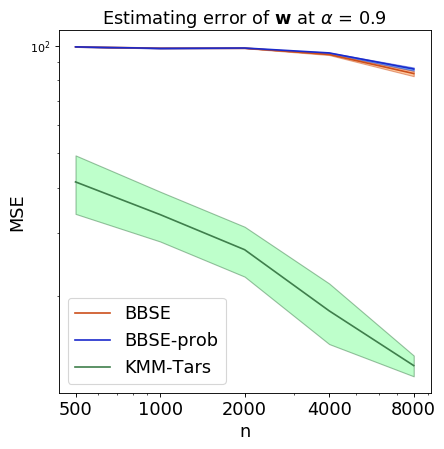

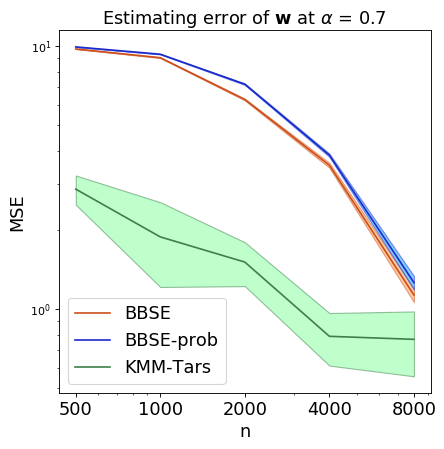

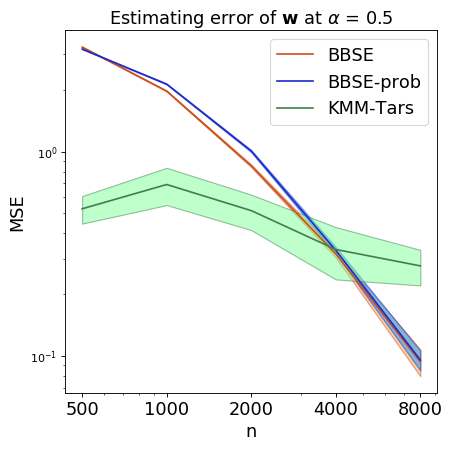

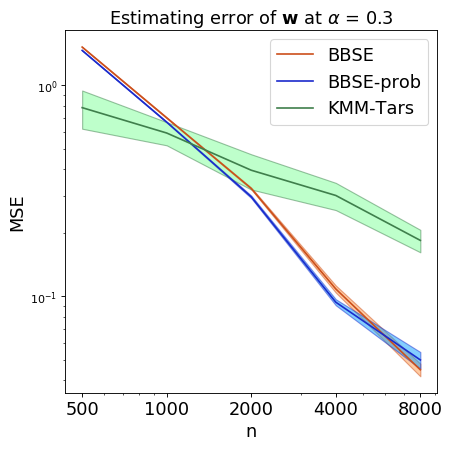

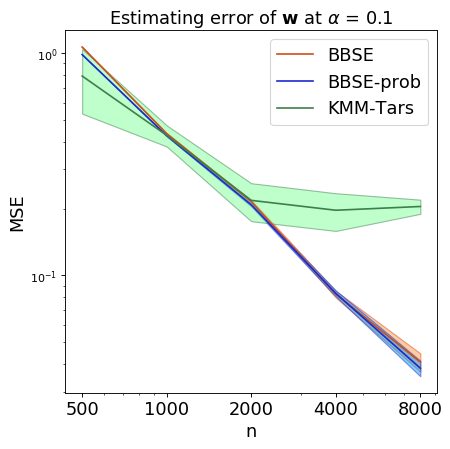

In [168]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:nlen];
    for i,name in enumerate(methods_name):
        if i==0:
            continue
        y=np.array(MSE_vs_n[(alpha,name)])
        error = np.array(STD_vs_n[(alpha,name)])
        plt.plot(x, y, 'k', color=colorlist[i-1])
        plt.fill_between(x, y-error, y+error,
            alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])
    
    plt.legend(methods_name[1:],fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("MSE", fontsize=16)
    plt.xscale('log')
    plt.xticks(nlist,nlist,fontsize=16)
    plt.yscale('log')
    plt.title(r"Estimating error of $\mathbf{w}$ at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()
    fig.savefig("figures/"+exp_name+"_estimation_alpha_"+repr(alpha)+".pdf", bbox_inches='tight')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


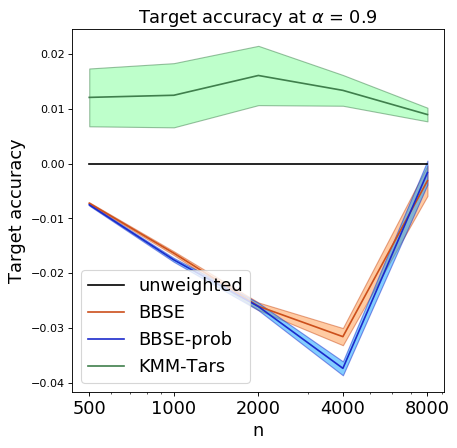

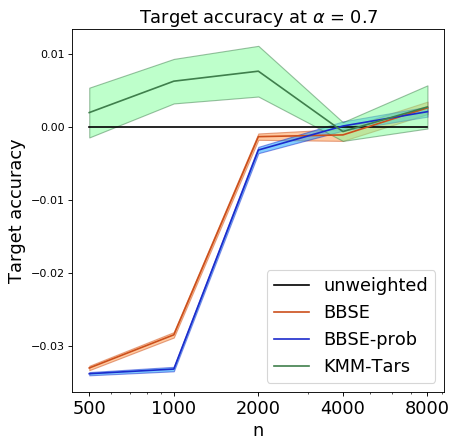

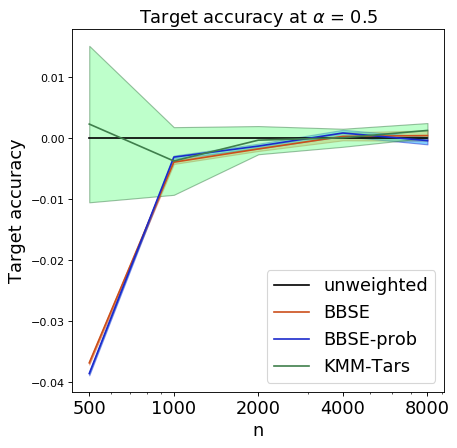

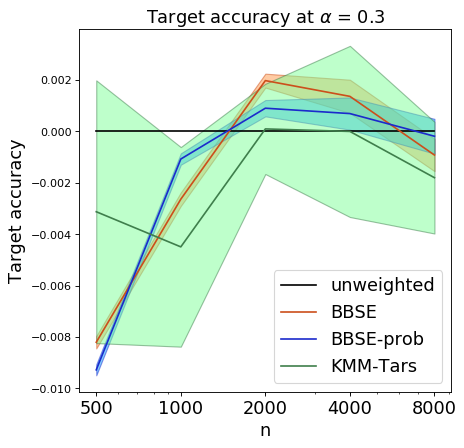

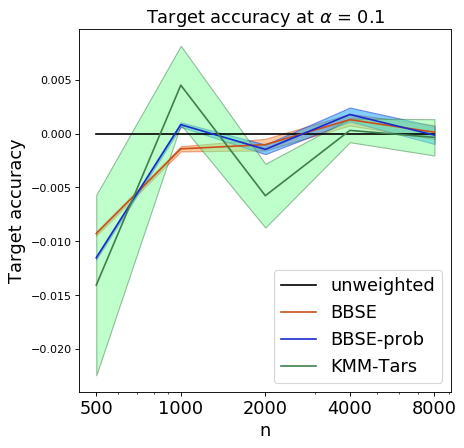

In [169]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:nlen];
    
    # plot the baseline
    y=np.array(RELACC_vs_n[(alpha,methods_name[0])])
    error = np.array(RELACCSTD_vs_n[(alpha,methods_name[0])])
    plt.plot(x, y, 'k')
    plt.fill_between(x, y-error, y+error,
                     alpha=0.5)
    
    # plot the relative improvements
    for i,name in enumerate(methods_name):
        if i==0:
            continue
        y=np.array(RELACC_vs_n[(alpha,name)])
        error = np.array(RELACCSTD_vs_n[(alpha,name)])
        plt.plot(x, y, 'k', color=colorlist[i-1])
        plt.fill_between(x, y-error, y+error,
            alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])

    
    plt.legend(methods_name,fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("Target accuracy", fontsize=16)
    plt.xscale('log')
    plt.xticks(nlist,nlist,fontsize=16)
    #plt.yscale('log')
    plt.title(r"Target accuracy at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()
    fig.savefig("figures/"+exp_name+"_relativeACC_"+repr(alpha)+".pdf", bbox_inches='tight')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


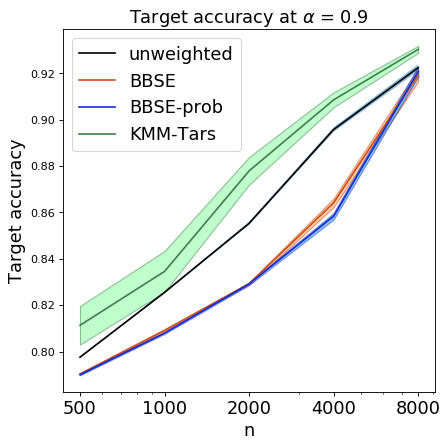

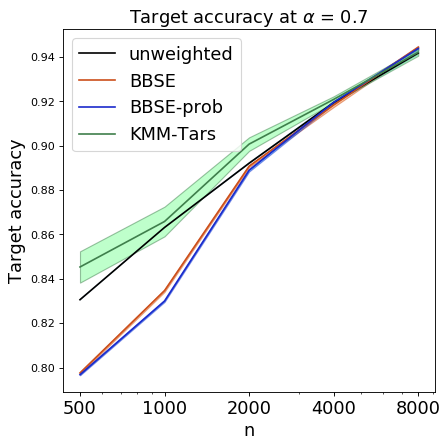

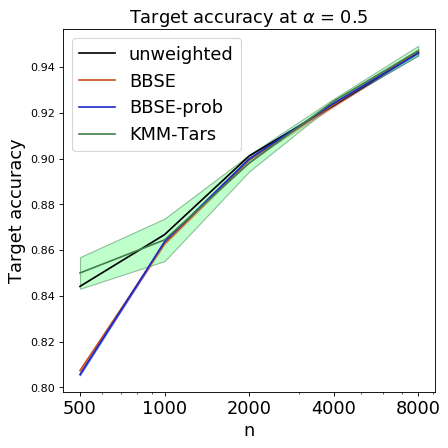

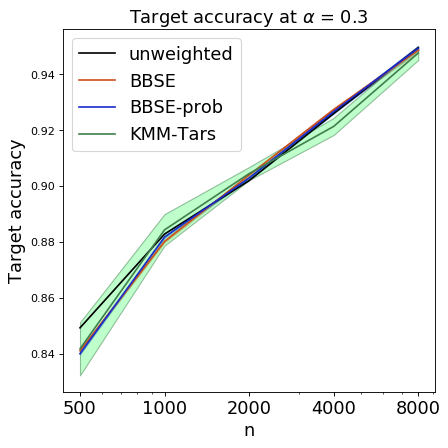

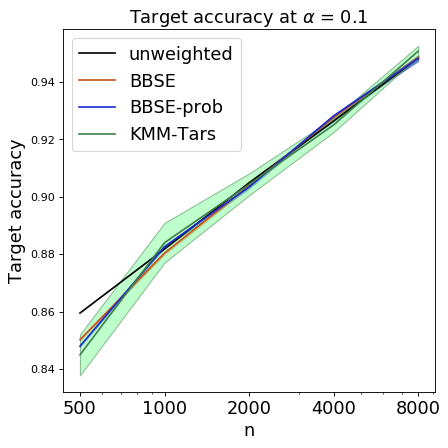

In [170]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:nlen];
    
    # plot the baseline
    y=np.array(ACC_vs_n[(alpha,methods_name[0])])
    error = np.array(ACCSTD_vs_n[(alpha,methods_name[0])])
    plt.plot(x, y, 'k')
    plt.fill_between(x, y-error, y+error,
                     alpha=0.5)
    
    # plot the relative improvements
    for i,name in enumerate(methods_name):
        if i==0:
            continue
        y=np.array(ACC_vs_n[(alpha,name)])
        error = np.array(ACCSTD_vs_n[(alpha,name)])
        plt.plot(x, y, 'k', color=colorlist[i-1])
        plt.fill_between(x, y-error, y+error,
            alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])

    
    plt.legend(methods_name,fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("Target accuracy", fontsize=16)
    plt.xscale('log')
    plt.xticks(nlist,nlist,fontsize=16)
    #plt.yscale('log')
    plt.title(r"Target accuracy at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()
    fig.savefig("figures/"+exp_name+"_ACC_"+repr(alpha)+".pdf", bbox_inches='tight')